Task - 4  Separation Data Cleaning & Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Part 1 – Basic Data Understanding (Pandas)

In [ ]:
df = pd.read_csv('/content/separated_names.csv')

df.head(10)

,id,ID,First_Name
0,12345Johnny,12345,Johnny
1,93829Sally,93829,Sally
2,20391Larry,20391,Larry
3,29324Valerie,29324,Valerie
4,43557Nina,43557,Nina
5,55027Bob,55027,Bob
6,78551Julia,78551,Julia
7,77268Nina,77268,Nina
8,19876Xander,19876,Xander
9,28290Fiona,28290,Fiona


In [ ]:
df.shape

(100, 3)

In [ ]:
df.columns

Index(['id', 'ID', 'First_Name'], dtype='object')

In [ ]:
df.dtypes

,0
id,object
ID,int64
First_Name,object


In [ ]:
df.isnull().sum()

,0
id,0
ID,0
First_Name,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['ID'].describe()

,ID
count,100.000000
mean,50694.190000
std,26500.870402
min,11314.000000
25%,26643.500000
50%,44728.000000
75%,74815.000000
max,95807.000000


In [ ]:
df['First_Name'].describe()

,First_Name
count,100
unique,28
top,Sophia
freq,8


Part 2 – Data Cleaning

In [ ]:
df['ID'] = df['id'].str[:5].astype(int)
df['First_Name'] = df['id'].str[5:]

df['First_Name'] = df['First_Name'].str.strip().str.title()

print(df['ID'].is_unique)

True


Part 3 – Exploratory Data Analysis (EDA)

0    Sophia
Name: First_Name, dtype: object
28
31    95807
98    94063
1     93829
32    92910
84    92725
Name: ID, dtype: int64
11    11314
0     12345
97    12962
52    13595
27    14287
Name: ID, dtype: int64


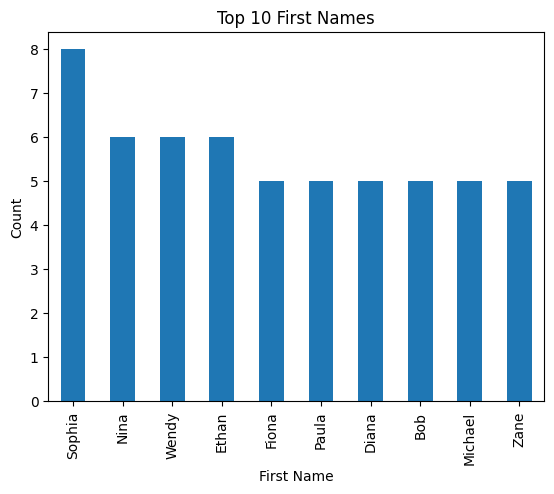

In [ ]:
print(df['First_Name'].mode())

print(df['First_Name'].nunique())

print(df['ID'].nlargest(5))

print(df['ID'].nsmallest(5))

df['First_Name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 10 First Names')
plt.show()

Part 4 – Statistics

In [ ]:
print("Mean : ",df['ID'].mean())

print("Median : ",df['ID'].median())

print("Variance : ",df['ID'].var())

print("Standard Deviation : ",df['ID'].std())

print("P(ID > 50000): ", (df['ID'] > 50000).mean())

print("P(Name starts with A): ", df['First_Name'].str.startswith("A").mean())

print("percentage of Names > 5 letters: ", (df['First_Name'].str.len() > 5).mean() * 100)

Mean :  50694.19
Median :  44728.0
Variance :  702296132.0746464
Standard Deviation :  26500.87040220842
P(ID > 50000):  0.45
P(Name starts with A):  0.04
percentage of Names > 5 letters:  33.0


Part 5 – Linear Algebra & NumPy

In [ ]:
ID_array = df['ID'].to_numpy()

score_array = np.random.randint(1, 100, size=len(df))

print("Addition:", ID_array + score_array)
print("Subtraction:", ID_array - score_array)

print("Dot Product:", np.dot(ID_array, score_array))

features = np.column_stack((ID_array, score_array))
weights = np.array([0.3, 0.7])
result = features @ weights
print("Matrix Multiplication Result:", result)

Addition: [12435 93918 20448 29415 43592 55049 78646 77333 19946 28323 38954 11336
 90425 79589 25782 31851 34225 47719 31476 27612 15345 87338 87540 18383
 19020 20296 82674 14323 92054 70744 17614 95827 92948 36450 15216 58131
 72505 61843 45619 42144 81629 26709 53375 73740 66425 90183 46867 90413
 62449 74989 24432 40001 13684 66329 36526 81696 46480 22542 81810 82156
 22206 63381 60526 60677 32922 26686 65278 36865 43031 32630 25263 65302
 88669 89467 17627 41459 27499 17361 25111 39369 40187 22398 71159 58287
 92808 16156 36875 87972 74820 85463 43967 89768 49917 42910 68609 58446
 43038 13011 94095 17126]
Subtraction: [12255 93740 20334 29233 43522 55005 78456 77203 19806 28257 38828 11292
 90287 79555 25646 31777 34043 47589 31412 27440 15233 87296 87410 18277
 18974 20186 82670 14251 92028 70698 17454 95787 92872 36262 15036 58033
 72393 61717 45447 42126 81457 26581 53203 73564 66303 90013 46773 90333
 62279 74833 24428 39911 13506 66299 36522 81628 46336 22400 81750 82102
 2

Part 6 – Feature Engineering

In [ ]:
df['Name_Length'] = df['First_Name'].str.len()
print(df['Name_Length'])

df['Starts_With_Vowel'] = df['First_Name'].fillna('').str[0].str.upper().isin(['A','E','I','O','U']).astype(int)
print(df['Starts_With_Vowel'])

df['High_ID'] = (df['ID'] > 50000).astype(int)
print(df['High_ID'])

df['Length_Quartile'] = pd.qcut(df['Name_Length'], 4, labels=False, duplicates='drop')
print(df['Length_Quartile'])

0     6
1     5
2     5
3     7
4     4
     ..
95    3
96    5
97    5
98    3
99    7
Name: Name_Length, Length: 100, dtype: int64
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    0
98    1
99    0
Name: Starts_With_Vowel, Length: 100, dtype: int64
0     0
1     1
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    1
99    0
Name: High_ID, Length: 100, dtype: int64
0     1
1     0
2     0
3     2
4     0
     ..
95    0
96    0
97    0
98    0
99    2
Name: Length_Quartile, Length: 100, dtype: int64


Part 7 – SQL Simulation in Pandas

In [ ]:
vowel_highID = df[(df['Starts_With_Vowel'] == 1) & (df['High_ID'] == 1)]
print(vowel_highID)

top_10_IDs = df.sort_values('ID', ascending=False).head(10)
print(top_10_IDs[['ID', 'First_Name']])

group_count = df.groupby('Starts_With_Vowel').size()
print(group_count)

sorted_df = df.sort_values(['Name_Length', 'ID'], ascending=[False, True])
print(sorted_df[['ID','First_Name','Name_Length']])

            id     ID First_Name  Name_Length  Starts_With_Vowel  High_ID  \
35    58082Uma  58082        Uma            3                  1        1   
37  61780Ethan  61780      Ethan            5                  1        1   
72  88577Ethan  88577      Ethan            5                  1        1   
73  89466Ethan  89466      Ethan            5                  1        1   
95    58388Ian  58388        Ian            3                  1        1   
98    94063Uma  94063        Uma            3                  1        1   

    Length_Quartile  
35                0  
37                0  
72                0  
73                0  
95                0  
98                0  
       ID First_Name
31  95807     Xander
98  94063        Uma
1   93829      Sally
32  92910     Sophia
84  92725       Nina
28  92041     Sophia
47  90373    Michael
12  90356      Paula
45  90098     Hannah
91  89694      Fiona
Starts_With_Vowel
0    83
1    17
dtype: int64
       ID First_Name  Name_L

Part 8 – Insights

Most Frequent Name: Sophia
Average ID: 50694.19
Correlation (ID vs Name_Length): -0.02587516459648293
Trend: No clear relationship between ID size and name length
Quartile with longest average IDs: 1


Text(0, 0.5, 'Name Length')

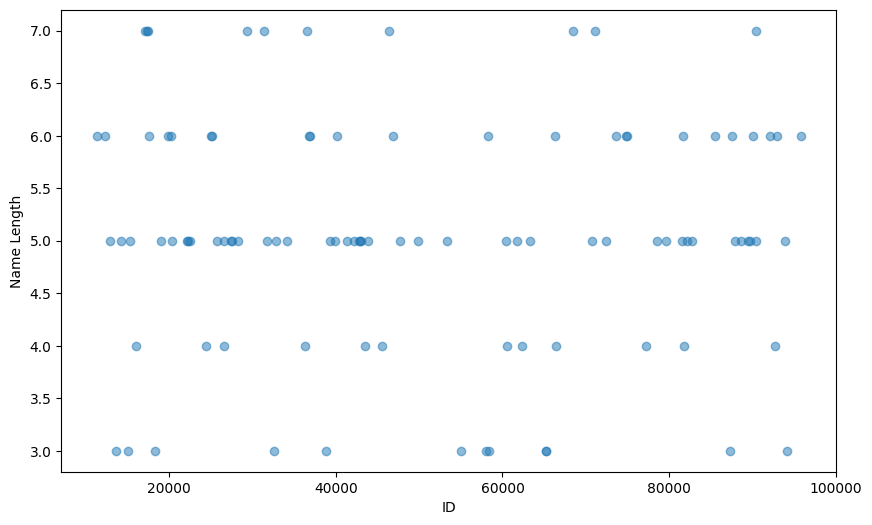

In [ ]:
print("Most Frequent Name:", df['First_Name'].mode()[0])

print("Average ID:", df['ID'].mean())

corr = df['ID'].corr(df['Name_Length'])
print("Correlation (ID vs Name_Length):", corr)
if corr > 0.3:
    print("Trend: Positive → Larger IDs tend to have longer names")
elif corr < -0.3:
    print("Trend: Negative → Larger IDs tend to have shorter names")
else:
    print("Trend: No clear relationship between ID size and name length")

print("Quartile with longest average IDs:", df.groupby('Length_Quartile')['ID'].mean().idxmax())